#                  Churn Prediction on telecom dataset

In [1]:
#importing pandas library
#Pandas is a popular data manipulation and analysis library in Python
import pandas as pd

In [2]:
#reading the csv file named telecom.csv and storing it in 'data' variable
data = pd.read_csv("telecom.csv")

# 1.Data Preprocessing

In [3]:
#checking the count of null values in the dataset
data.isna().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [4]:
''' it will display a summary of information, including the number of non-null values, data types of columns,
 and memory usage.'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [5]:
#Here I'm storing the columns with yes or no values in a variable cat_cols
cat_cols = ["voice.plan","intl.plan","day.charge","eve.mins","churn"]


In [6]:
#replacing the yes with 1 and no with 0
data[cat_cols] = data[cat_cols].replace({"yes":1,"no":0}).astype("float")

In [7]:
#checking the columns for the changes done(object to float conversion)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   float64
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   float64
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      4993 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

# 2.Handling null values

In [8]:
#filling the null values in day.charge column with mean value of the column
data["day.charge"].fillna(data["day.charge"].mean(),inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   float64
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   float64
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   float64
 13  eve.mins        4976 non-null   float64
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [10]:
#filling the null values in eve.mins column with mean value of the column
data["eve.mins"].fillna(data["eve.mins"].mean(),inplace=True)

In [11]:
#iloc method is used to select rows and columns from the dataset
#x takes all the rows and 3rd-19th columns from the data(dataset)
#x takes all the rows and 20th column from the data(dataset)
x = data.iloc[:,3:20]
y = data.iloc[:,20]

In [12]:
#displaying x
x

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.mins,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls
0,128,1.0,25,0.0,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1
1,107,1.0,26,0.0,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1
2,137,0.0,0,0.0,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0
3,84,0.0,0,1.0,6.6,7,1.78,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,2
4,75,0.0,0,1.0,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1.0,40,0.0,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2
4996,152,0.0,0,0.0,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3
4997,61,0.0,0,0.0,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1
4998,109,0.0,0,0.0,8.5,6,2.30,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,0


In [13]:
#displaying y
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    1.0
4997    0.0
4998    0.0
4999    0.0
Name: churn, Length: 5000, dtype: float64

In [14]:
x.isna().sum()

account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
dtype: int64

In [15]:
#MinMaxScaler is a class used for scaling numerical features to a specific range, typically between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_features=scaler.fit_transform(x)
scaled_features

array([[0.52479339, 1.        , 0.48076923, ..., 0.52      , 0.61958357,
        0.11111111],
       [0.43801653, 1.        , 0.5       , ..., 0.58857143, 0.6443444 ,
        0.11111111],
       [0.56198347, 0.        , 0.        , ..., 0.59428571, 0.41193022,
        0.        ],
       ...,
       [0.24793388, 0.        , 0.        , ..., 0.55428571, 0.53798537,
        0.11111111],
       [0.44628099, 0.        , 0.        , ..., 0.50857143, 0.56837366,
        0.        ],
       [0.35123967, 1.        , 0.65384615, ..., 0.57142857, 0.3922341 ,
        0.        ]])

In [16]:
'''train_test_split is a utility function in scikit-learn (sklearn) that splits our data into training and 
testing subsets. random_state=10, It ensures that the data split is the same every time you run the code,
which is important for consistency'''
from sklearn.model_selection import train_test_split
x_train, x_test , y_train ,y_test = train_test_split(scaled_features,y,test_size=0.20,random_state=10)

In [17]:
#no. of rows and columns
x_train.shape

(4000, 17)

In [18]:
y_train.shape

(4000,)

# 3.Model Selection

In [19]:
'''KNeighborsClassifier is a machine learning algorithm that falls under the category of supervised learning, 
specifically for classification tasks.It uses the k-nearest neighbors approach to classify data points based 
on the majority class among their k-nearest neighbors'''
from sklearn.neighbors import KNeighborsClassifier
#n_neighbors=7 argument specifies that the model should consider 7 nearest neighbors when making predictions.
model = KNeighborsClassifier(n_neighbors=7)

In [20]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [21]:
pred = model.predict(x_test)

In [22]:
from sklearn.metrics import *
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       851
         1.0       0.93      0.37      0.53       149

    accuracy                           0.90      1000
   macro avg       0.92      0.68      0.74      1000
weighted avg       0.90      0.90      0.88      1000



In [23]:
accuracy = []
for i in range(1,30,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test,pred))

In [24]:
accuracy

[0.878,
 0.896,
 0.898,
 0.902,
 0.899,
 0.901,
 0.9,
 0.894,
 0.895,
 0.898,
 0.892,
 0.891,
 0.889,
 0.885,
 0.885]

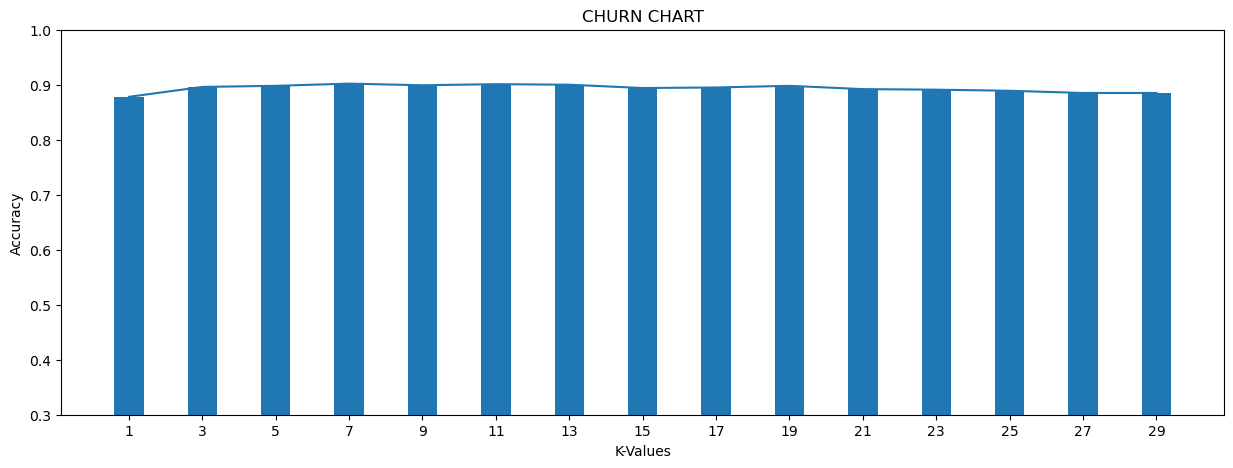

In [25]:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15,5))
    plt.title("CHURN CHART")
    plt.xlabel("K-Values")
    plt.ylabel("Accuracy")
    plt.ylim(0.3,1)
    #this line plots a line chart using the 'range(1, 30, 2)' as the x-values (k-values) and the 'accuracy' list as the y-values.
    plt.plot(range(1,30,2),accuracy)
    #This line plots a bar chart using the same x-values and y-values. 
    plt.bar(range(1,30,2),accuracy)
    # Sets the x-axis ticks to be the same as the k-values (range from 1 to 29 with a step of 2).
    plt.xticks(range(1,30,2))
    plt.show()